In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


sns.set_theme(style='white', context='notebook', palette='deep')

In [15]:
train_X = pd.read_csv("kaggle_datasets/train.csv")
test_data = pd.read_csv("kaggle_datasets/test.csv")
train_Y = train_X.pop('label')

In [16]:
from keras.utils import to_categorical
#train_X.describe()
train_X = train_X / 255.0
test_data = test_data / 255.0
train_X = train_X.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)
train_Y = to_categorical(train_Y, num_classes = 10)

In [18]:
#display(train_X.shape, test_data.shape)
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size = 0.1, random_state=2)

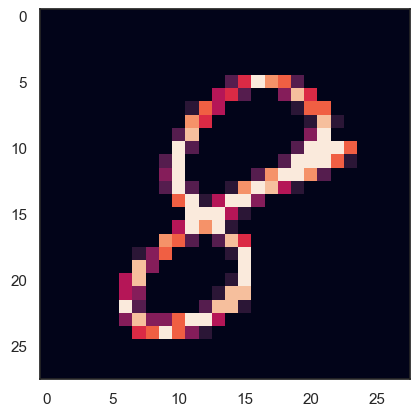

In [22]:
g = plt.imshow(train_X[0][:,:,0])

In [ ]:
# model = Sequential([
#     Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)),
#     Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu'),
#     MaxPool2D(pool_size=(2,2)),
#     Dropout(0.25),
#     Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'),
#     Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'),
#     MaxPool2D(pool_size=(2,2), strides=(2,2)),
#     Dropout(0.25),
#     Flatten(),
#     Dense(256, activation = "relu"),
#     Dropout(0.5),
#     Dense(10, activation = "softmax")
# ])
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])